# World Happiness Report

Emma Crawford

May 9, 2023 


## Project Topic

This project will explore the factors that may contribute to happiness across the countries of the world. Here are a few key features of the project:

* **Datasets**: 
     * https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023
     * https://tradingeconomics.com/country-list/temperature
* **Problem Type**: Regression since all of the measures within the data are continuous
* **Columns**: Country, Happiness Score (Ladder Score), GDP per capita, Social support, Life expectancy, Freedom to make life choices, Generosity, Perception of corruption, Average annual temperature
* **Goal**: I would like to know if productivity (GDP), freedom, and generosity are negatively or positively correlated with happiness. If I have time in the project, I would also like to know if temperature is postively/negatively correlated with happiness. 
* **Importance**: The western mindset seems to hold that productivity, freedom, and warm weather are positively correlated with happiness and that generosity (which is more focused on collectivism rather than individualism) is negatively correlated with happiness. I would like to know whether or not these views are supported by the data we currently have. 

## Bonus Section

This is not a typical data science problem and is personally interesting to me, which will make it more motivating. Additionally, it is unique because I will be adding narrative and bringing in political and cultural citations beyond my data that support or contradict my findings. This will bring real-world context to the project and provide a broader lens on each countries' correlates with happiness.

## Data

This data comes from multiple data sources: 1) The World Happiness Report 2023 and 2) Temperature data for each country.

### APA Citations 

Gallup World Poll (2023, March 20). World Happiness Report 2023. Kaggle. Retrieved April 19, 2023, from https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023

Trading Economics (2021, December 1). Average Temperature By Country. Retrieved April 19, 2023, from https://tradingeconomics.com/country-list/temperature

### Sources

**Source for the World Happiness data:** 
*"The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data. The World Happiness Report reflects a worldwide demand for more attention to happiness and well-being as criteria for government policy. It reviews the state of happiness in the world today and shows how the science of happiness explains personal and national variations in happiness...Life evaluations from the Gallup World Poll provide the basis for the annual happiness rankings. They are based on answers to the main life evaluation question. The Cantril ladder asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples over three years."* (2023)

**Source for the Temperature data:** 
*"Trading Economics provides its users with accurate information for 196 countries including historical data and forecasts for more than 20 million economic indicators, exchange rates, stock market indexes, government bond yields and commodity prices. Our data is based on official sources, not third party data providers, and our facts are regularly checked for inconsistencies."* (2021)

### Data Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
h23 = pd.read_csv("WHR2023.csv")
temp = pd.read_csv("AverageAnnualTempByCountry2021.csv")

In [3]:
print('Rows of Happiness Data: ', len(h23.index))
print('Rows of Temperature Data: ', len(temp.index))

Rows of Happiness Data:  137
Rows of Temperature Data:  205


In [4]:
print('Columns/Features of Happiness Data: ', len(h23.columns))
print('Columns/Features of Temperature Data: ', len(temp.columns))

Columns/Features of Happiness Data:  19
Columns/Features of Temperature Data:  5


In [5]:
h23.dtypes

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

In [6]:
temp.dtypes

Country       object
Last         float64
Previous     float64
Reference     object
Unit          object
dtype: object

### Happiness Data

In [7]:
h23.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [8]:
# Because we are only interested in GDP, freedom, generosity, and weather, we will drop all unrelated columns.
h23 = h23.drop(columns=['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Healthy life expectancy', 
                  'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Social support', 
                  'Explained by: Healthy life expectancy', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])

In [9]:
# Columns names are simplified for readability
h23 = h23.rename(columns={'Country name': 'country', 'Ladder score': 'ladder', 'Logged GDP per capita': 'GDP', 'Social support': 'social', 'Freedom to make life choices':'freedom', 'Generosity': 'generosity', 
                    'Explained by: Log GDP per capita': 'exp: GDP', 'Explained by: Freedom to make life choices': 'exp: freedom', 
                    'Explained by: Generosity' : 'exp: generosity'})

In [10]:
h23.head()

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity
0,Finland,7.804,10.792,0.969,0.961,-0.019,1.888,0.772,0.126
1,Denmark,7.586,10.962,0.954,0.934,0.134,1.949,0.734,0.208
2,Iceland,7.530,10.896,0.983,0.936,0.211,1.926,0.738,0.250
3,Israel,7.473,10.639,0.943,0.809,-0.023,1.833,0.569,0.124
4,Netherlands,7.403,10.942,0.930,0.887,0.213,1.942,0.672,0.251


In [11]:
# check the datatypes to make sure they are usuable by regression analysis
h23.dtypes

country             object
ladder             float64
GDP                float64
social             float64
freedom            float64
generosity         float64
exp: GDP           float64
exp: freedom       float64
exp: generosity    float64
dtype: object

In [12]:
# quick check for duplicates
h23.loc[h23.duplicated()]

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity


In [13]:
# quick check for nulls
h23.isnull().sum()

country            0
ladder             0
GDP                0
social             0
freedom            0
generosity         0
exp: GDP           0
exp: freedom       0
exp: generosity    0
dtype: int64

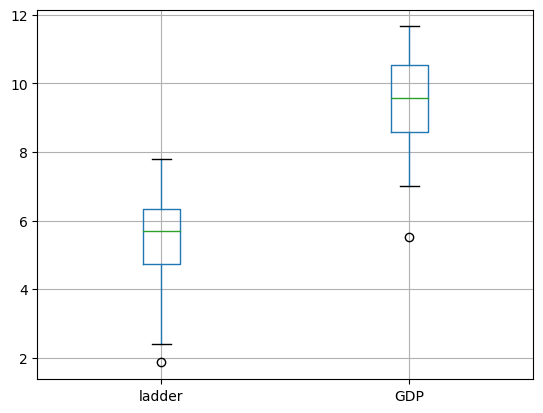

In [14]:
# check box plots for outliers which we may remove later and to get an idea of the spread of the data
h23.boxplot(column=['ladder', 'GDP'])  
plt.show()

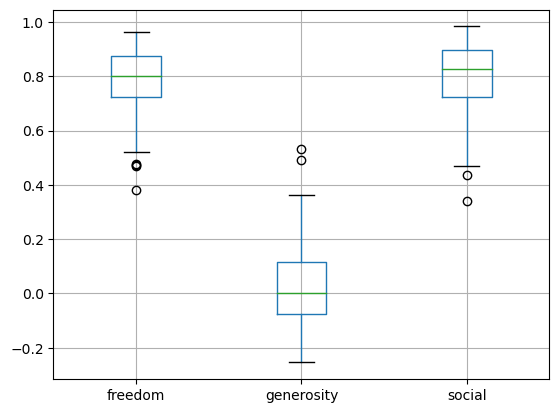

In [15]:
h23.boxplot(column=['freedom', 'generosity', 'social'])  
plt.show()

In [16]:
# all measures have at least one outlier which will be removed before making calculations
# In other words, all data points that are outside the whiskers will be considered and outlier and removed

h23.describe()

,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,0.787394,0.022431,1.406985,0.540000,0.148474
std,1.139929,1.207302,0.129222,0.112371,0.141707,0.432963,0.149501,0.076053
min,1.859000,5.527000,0.341000,0.382000,-0.254000,0.000000,0.000000,0.000000
25%,4.724000,8.591000,0.722000,0.724000,-0.074000,1.099000,0.455000,0.097000
50%,5.684000,9.567000,0.827000,0.801000,0.001000,1.449000,0.557000,0.137000
75%,6.334000,10.540000,0.896000,0.874000,0.117000,1.798000,0.656000,0.199000
max,7.804000,11.660000,0.983000,0.961000,0.531000,2.200000,0.772000,0.422000


### Temperature Data

In [17]:
temp.head()

,Country,Last,Previous,Reference,Unit
0,Burkina Faso,30.01,29.63,21-Dec,celsius
1,Mali,29.78,29.40,21-Dec,celsius
2,Senegal,29.63,29.56,21-Dec,celsius
3,Qatar,29.42,28.45,21-Dec,celsius
4,Mauritania,29.30,29.10,21-Dec,celsius


In [18]:
# remove previous, reference, and unit columns because we only need the most recent temp data to join to the happiness table
temp = temp.drop(columns=['Previous', 'Reference', 'Unit'])

In [19]:
# rename columns for readability and cohesion with the happiness table
temp = temp.rename(columns={'Country': 'country', 'Last': 'avg_tempF'})

In [20]:
temp.dtypes

country       object
avg_tempF    float64
dtype: object

In [21]:
# quick check for duplicates
temp.loc[temp.duplicated()]

,country,avg_tempF


In [22]:
# quick check for nulls
temp.isnull().sum()

country      0
avg_tempF    0
dtype: int64

In [23]:
# convert to farenheit
temp['avg_tempF'] = temp['avg_tempF'].apply(lambda x: (9/5) * x + 32)

In [24]:
temp.head()

,country,avg_tempF
0,Burkina Faso,86.018
1,Mali,85.604
2,Senegal,85.334
3,Qatar,84.956
4,Mauritania,84.740


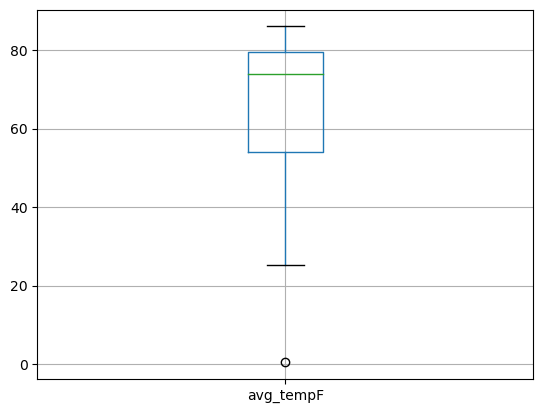

In [25]:
temp.boxplot(column=['avg_tempF'])  
plt.show()

### Joined Data Set

In [26]:
# left join temperature tables on country name to happiness table

final_set = h23.merge(temp, on='country', how='left')

In [27]:
final_set.head()

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
0,Finland,7.804,10.792,0.969,0.961,-0.019,1.888,0.772,0.126,36.140
1,Denmark,7.586,10.962,0.954,0.934,0.134,1.949,0.734,0.208,48.056
2,Iceland,7.530,10.896,0.983,0.936,0.211,1.926,0.738,0.250,36.320
3,Israel,7.473,10.639,0.943,0.809,-0.023,1.833,0.569,0.124,69.566
4,Netherlands,7.403,10.942,0.930,0.887,0.213,1.942,0.672,0.251,50.702


In [28]:
# quick check for nulls
final_set.isnull().sum()

country            0
ladder             0
GDP                0
social             0
freedom            0
generosity         0
exp: GDP           0
exp: freedom       0
exp: generosity    0
avg_tempF          9
dtype: int64

In [29]:
final_set[final_set['avg_tempF'].isnull()]

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
17,Czechia,6.845,10.611,0.953,0.903,0.040,1.823,0.693,0.158,NaN
26,Taiwan Province of China,6.535,10.797,0.884,0.804,-0.129,1.890,0.562,0.067,NaN
33,Kosovo,6.368,9.359,0.844,0.861,0.259,1.374,0.639,0.275,NaN
81,Hong Kong S.A.R. of China,5.308,10.966,0.817,0.687,-0.026,1.951,0.407,0.123,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,0.730,-0.004,0.921,0.464,0.134,NaN
86,North Macedonia,5.254,9.703,0.805,0.769,0.131,1.498,0.515,0.207,NaN
98,State of Palestine,4.908,8.716,0.859,0.694,-0.132,1.144,0.416,0.065,NaN
105,Turkiye,4.614,10.307,0.796,0.475,-0.077,1.714,0.125,0.095,NaN
132,Congo (Kinshasa),3.207,7.007,0.652,0.664,0.086,0.531,0.375,0.183,NaN


In [30]:
#h23.loc[h23['country'] == 'Czechia']
h23['country'].str.contains('Czech').any()

True

In [31]:
temp['country'].str.contains('Macedonia').sum()

1

In [32]:
# replace differently spelled countries with matched names in happiness table

temp = temp.replace(['Czech Republic'], 'Czechia')
temp = temp.replace(['Palestine'], 'State of Palestine')
temp = temp.replace(['Turkey'], 'Turkiye')
temp = temp.replace(['Macedonia'], 'North Macedonia')
temp = temp.replace(['Congo'], 'Congo (Brazzaville)')

# rerun the left join with the new country values
final_set = h23.merge(temp, on='country', how='left')


In [33]:
# review the NaN's one more time
final_set[final_set['avg_tempF'].isnull()]

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
26,Taiwan Province of China,6.535,10.797,0.884,0.804,-0.129,1.890,0.562,0.067,NaN
33,Kosovo,6.368,9.359,0.844,0.861,0.259,1.374,0.639,0.275,NaN
81,Hong Kong S.A.R. of China,5.308,10.966,0.817,0.687,-0.026,1.951,0.407,0.123,NaN
132,Congo (Kinshasa),3.207,7.007,0.652,0.664,0.086,0.531,0.375,0.183,NaN


In [34]:
# drop rows with NaN temperature and ensure they are removed
final_set = final_set.dropna()
final_set[final_set['avg_tempF'].isnull()]

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF


In [35]:
# we will drop outliers for now to make analysis cleaner
from scipy import stats

numset = final_set[['GDP', 'freedom', 'social', 'generosity', 'avg_tempF']]
cols = ['GDP', 'freedom', 'social', 'generosity', 'avg_tempF'] # one or more

Q1 = final_set[cols].quantile(0.25)
Q3 = final_set[cols].quantile(0.75)
IQR = Q3 - Q1

final_set = final_set[~((final_set[cols] < (Q1 - 1.5 * IQR)) |(final_set[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
# review the final set that is ready for analysis!
final_set.head()

,country,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
0,Finland,7.804,10.792,0.969,0.961,-0.019,1.888,0.772,0.126,36.140
1,Denmark,7.586,10.962,0.954,0.934,0.134,1.949,0.734,0.208,48.056
2,Iceland,7.530,10.896,0.983,0.936,0.211,1.926,0.738,0.250,36.320
3,Israel,7.473,10.639,0.943,0.809,-0.023,1.833,0.569,0.124,69.566
4,Netherlands,7.403,10.942,0.930,0.887,0.213,1.942,0.672,0.251,50.702


In [37]:
final_set.describe()

,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
count,125.00000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,5.64712,9.51912,0.810168,0.800376,0.016712,1.431848,0.557272,0.145392,64.346144
std,1.05080,1.14334,0.117146,0.097289,0.130117,0.410027,0.129400,0.069823,15.287829
min,3.13800,7.09100,0.531000,0.522000,-0.254000,0.561000,0.187000,0.000000,25.322000
25%,4.90800,8.63500,0.729000,0.733000,-0.070000,1.115000,0.467000,0.099000,50.630000
50%,5.76300,9.61000,0.836000,0.804000,0.003000,1.465000,0.562000,0.138000,68.648000
75%,6.40500,10.54100,0.906000,0.877000,0.114000,1.798000,0.660000,0.197000,77.414000
max,7.80400,11.66000,0.983000,0.961000,0.364000,2.200000,0.772000,0.332000,86.018000


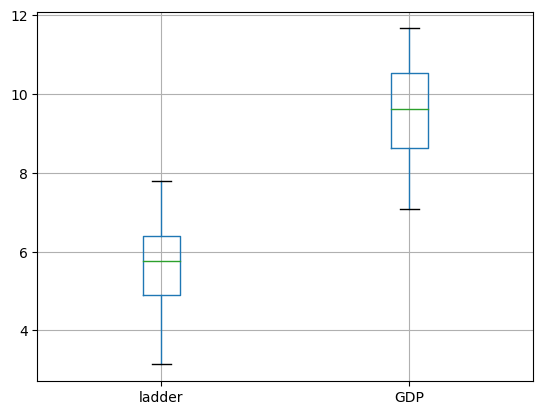

In [38]:
#double-check for outliers
final_set.boxplot(column=['ladder', 'GDP'])  
plt.show()

## Regression Exploration

**Additional visual beyond simple boxplots**

The ***correlation matrix*** below will give us an idea of how the data fields are relating to each other. In addition, we have added the correlation coefficient to provide additional guidance on how to analyze colinearity and what to dive deeper into for our model. 

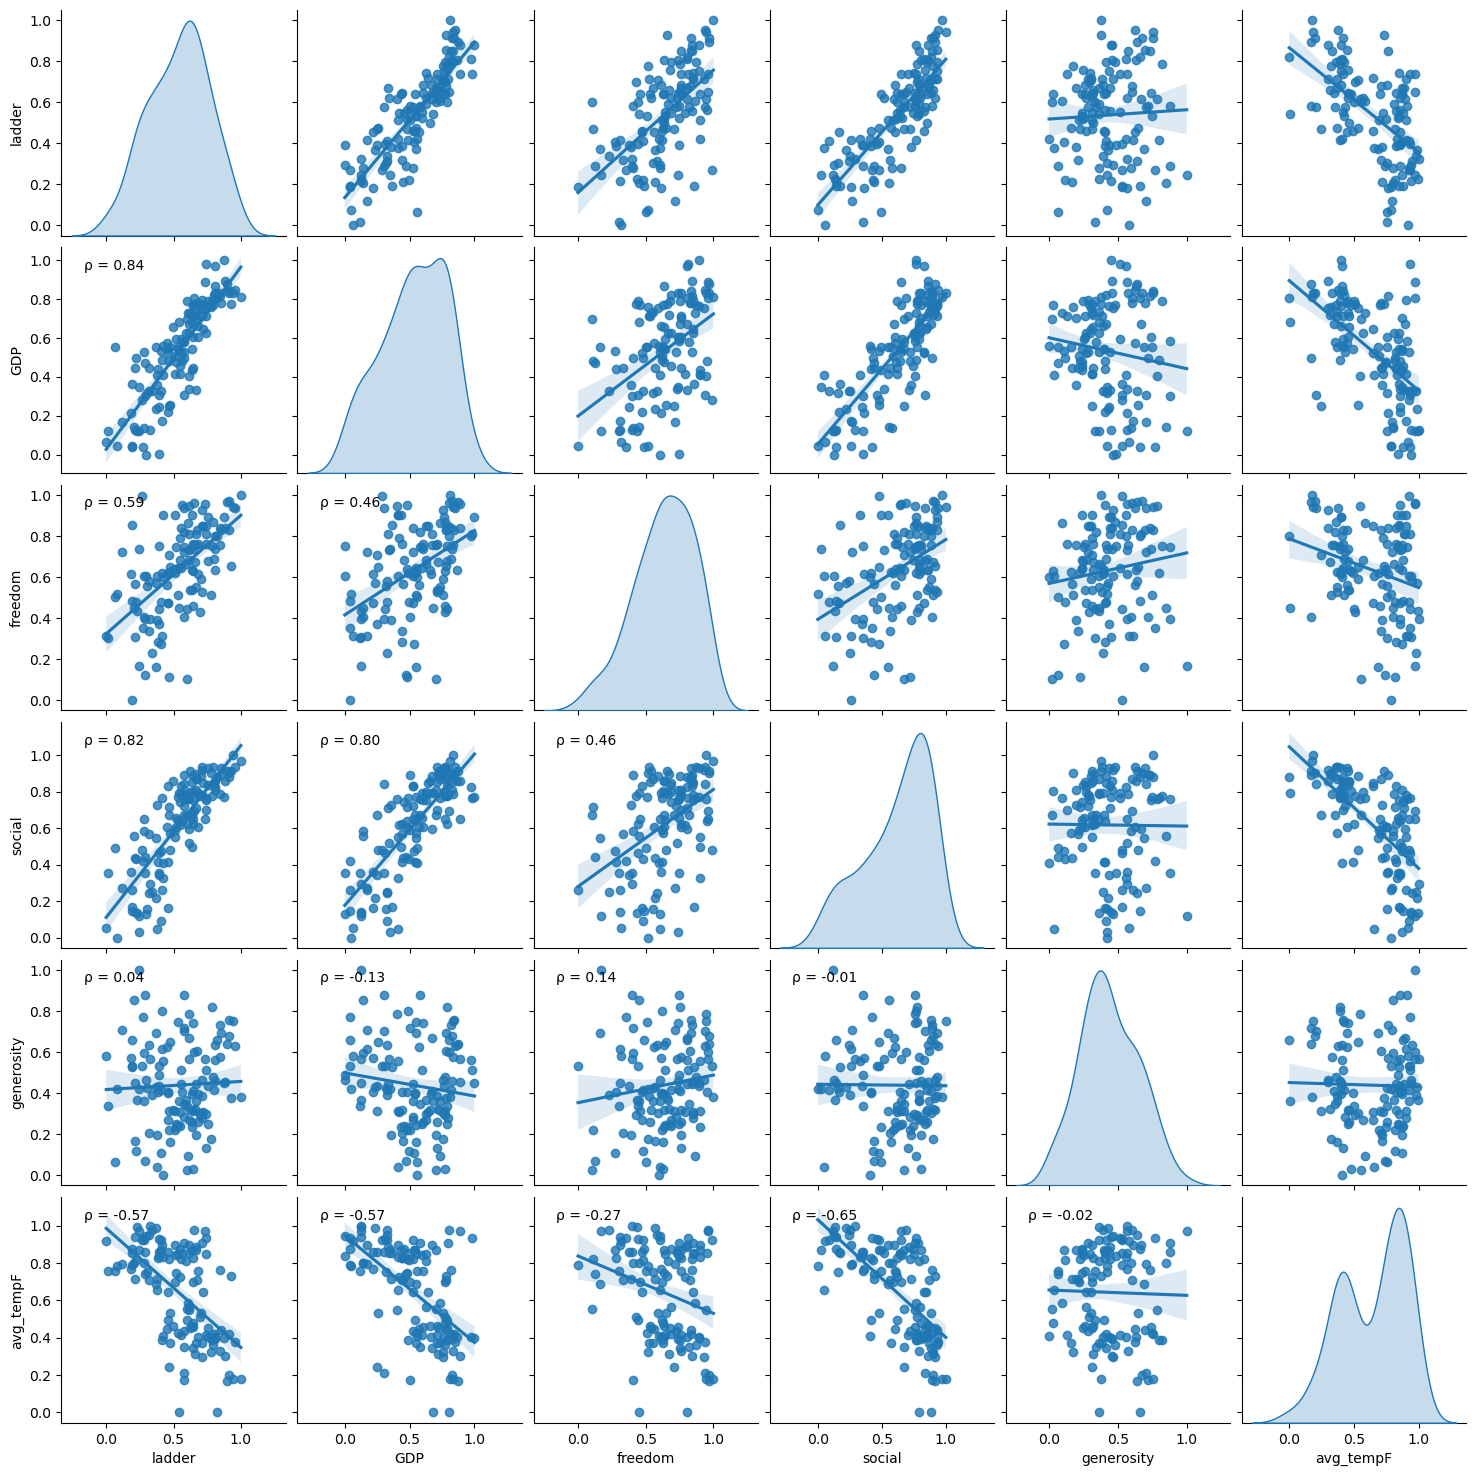

In [39]:
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

#https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

fields = ['ladder', 'GDP', 'freedom', 'social', 'generosity', 'avg_tempF']
plot = final_set.copy()
for attr in fields:
    plot[attr] = sklearn.preprocessing.MinMaxScaler().fit_transform(plot[attr].values.reshape(-1,1))

pp = sns.pairplot(plot, vars=fields, kind="reg", diag_kind='kde')
pp.map_lower(corrfunc)
plt.show()

The correlation matrix indicates that we should examine colinearity amoung the following attributes: GDP, freedom, social, avg_tempF. We will look at a ***heat map*** to get more overview information on the strengths of these relationship. Also, because generosity has little to no correlation or interaction, we will not dive deeper into that field. The temperature field is bimodal, which we will explore later in the analysis with ***feature engineering***. 

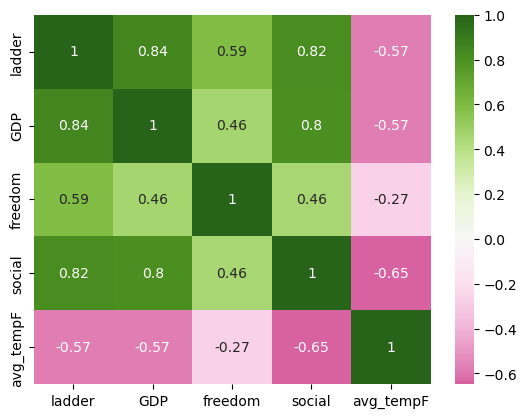

In [40]:
# citation: https://datatofish.com/correlation-matrix-pandas/
corr_df = final_set.filter(items=['ladder', 'GDP', 'freedom', 'social','avg_tempF'])
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", center=0)
plt.show()

The heatmap shows a more visually clear picture that GDP, social, freedom, and temperature attributes should be analyzed for colinearity.

### Exploring Colinearity with VIF (new technique not covered in class)

We will use the variance inflation factor to provide a threshold (>5) that will help us decide if multicolinearity is present. 

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = final_set[['GDP', 'freedom', 'social', 'avg_tempF']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print('Fields: ', X.columns)
print(vif_data, '\n')

X = final_set[['GDP', 'freedom', 'avg_tempF']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print('Fields: ', X.columns)
print(vif_data, '\n')

X = final_set[['GDP', 'avg_tempF']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print('Fields: ', X.columns)
print(vif_data, '\n')

Fields:  Index(['GDP', 'freedom', 'social', 'avg_tempF'], dtype='object')
     feature         VIF
0        GDP  185.778596
1    freedom   83.824716
2     social  153.776293
3  avg_tempF   13.471693 

Fields:  Index(['GDP', 'freedom', 'avg_tempF'], dtype='object')
     feature        VIF
0        GDP  65.689145
1    freedom  77.921094
2  avg_tempF  12.333345 

Fields:  Index(['GDP', 'avg_tempF'], dtype='object')
     feature        VIF
0        GDP  10.394406
1  avg_tempF  10.394406 



Based on our VIFs above, we will assume that it is safe to move forward with GDP and temperature because VIF < 5 when no other fields are present. However, VIF is more than 5 when freedom and social fields are included. We will further examine the interaction between these fields. We will first examine the independent variables separately and then explore some interactions between them. 

In [42]:
from scipy.stats import linregress
    
def lin_regress(x_axis, x_label):
    plt.scatter(x_axis, final_set["ladder"], color = "black", edgecolors = "black")
    plt.suptitle(f"{x_label} vs. Happiness Score (2023)", weight = "bold")
    plt.xlabel(x_label)
    plt.ylabel("Happiness Score")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, final_set["ladder"])
    fit = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.annotate(line_eq, (6, 70), fontsize=10, color="red")
    plt.title(f"r = {rvalue}", loc="right")
    plt.plot(x_axis, fit, color= "red")
    plt.show()

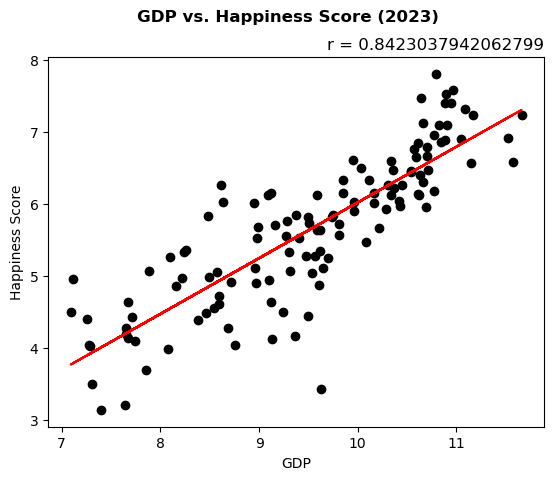

In [43]:
lin_regress(final_set["GDP"], "GDP")

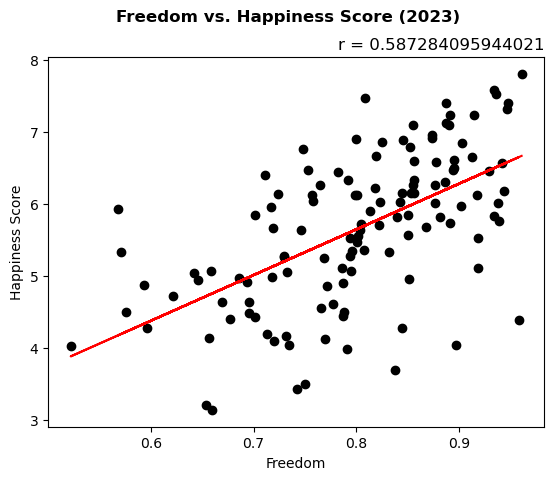

In [44]:
lin_regress(final_set["freedom"], "Freedom")

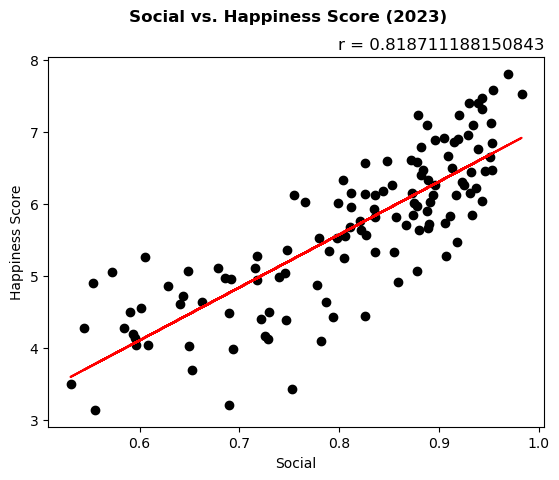

In [45]:
lin_regress(final_set["social"], "Social")

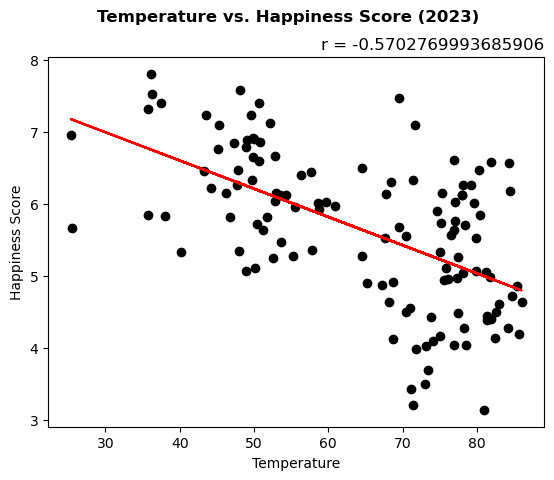

In [46]:
lin_regress(final_set["avg_tempF"], "Temperature")

### Simple Linear Regression Models

In [47]:
import statsmodels.api as sm

y = final_set['ladder']
x = final_set[['GDP']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

y = final_set['ladder']
x = final_set[['freedom']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

y = final_set['ladder']
x = final_set[['social']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

y = final_set['ladder']
x = final_set[['avg_tempF']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ladder   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 09 May 2023   Prob (F-statistic):           8.22e-35
Time:                        05:36:36   Log-Likelihood:                -105.81
No. Observations:                 125   AIC:                             215.6
Df Residuals:                     123   BIC:                             221.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7219      0.428     -4.021      0.0

The summaries above show that we only have a good fit (R^2 > 0.70) for GDP and that we do not have a good fit for freedom, social, or avg_tempF. However, we do still have a high correlation between happiness and social. We will save avg_tempF for later because the data is bimodal which indicates the potential need for a different model. However, we will move forward with GDP, freedom, and social. 

### Multilinear Regression Model

In [48]:
import statsmodels.formula.api as smf

data = final_set
model = smf.ols(formula='ladder ~ freedom:GDP:social', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ladder   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     510.6
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.32e-45
Time:                        05:36:36   Log-Likelihood:                -80.607
No. Observations:                 125   AIC:                             165.2
Df Residuals:                     123   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6035      0

After some testing, the best fit that held statistical significance for each coefficient was the summary above: freedom + GDP:social, which provided a better fit than the simple linear models. This suggests (if our model accurately represents the data and if we are making correct assumptions about the data) that happiness increases with a unit of freedom and BOTH a unit of GDP and unit of social. There is an interaction between freedom, GDP and social which indicates that they have some type of dependence on one another. However, our simple linear regression model had a worse fit, but still adequate fit when only using GDP, so we can conlude (given the previous assumptions) that GDP alone is also a good model. 

### Feature Engineering

We will now run similar analyses, but with the average temperatures split into groups based on the peaks in the KDE. This will allow us to understand how different temperature 'regions' may influence happiness and the factors that are correlated with the happiness score. 

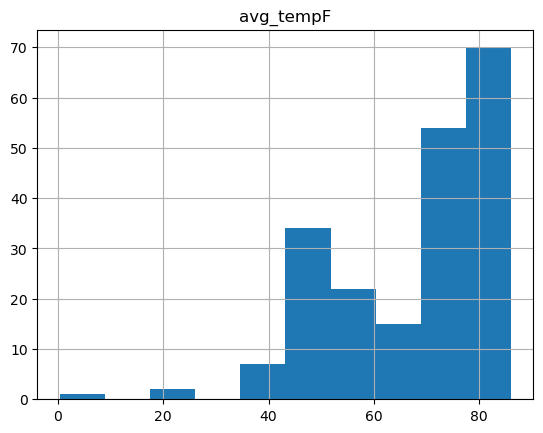

In [49]:
temp.hist(column=['avg_tempF'])  
plt.show()

In [50]:
# split temp data into two groups by minimum (valley)
from scipy.signal import argrelextrema

arr = final_set['avg_tempF'].values
mint = argrelextrema(arr, np.less, order=30)[0]
print(mint)
cold =  final_set[(final_set['avg_tempF'] <= 67)]
hot =  final_set[(final_set['avg_tempF'] > 67)]
cold.describe()

[12 67]


,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,6.299714,10.230268,0.887393,0.828589,0.014607,1.686857,0.594804,0.144321,49.189036
std,0.729649,0.751124,0.073244,0.078115,0.136766,0.269392,0.103934,0.073382,8.423586
min,4.903000,8.237000,0.553000,0.568000,-0.254000,0.972000,0.248000,0.000000,25.322000
25%,5.818750,9.729250,0.877250,0.785000,-0.068000,1.507000,0.537500,0.100000,45.945500
50%,6.236500,10.394500,0.906000,0.824000,-0.003500,1.745500,0.588500,0.134500,49.955000
75%,6.867250,10.721250,0.932250,0.888000,0.138000,1.863000,0.673500,0.210500,53.523500
max,7.804000,11.660000,0.983000,0.961000,0.253000,2.200000,0.772000,0.272000,65.264000


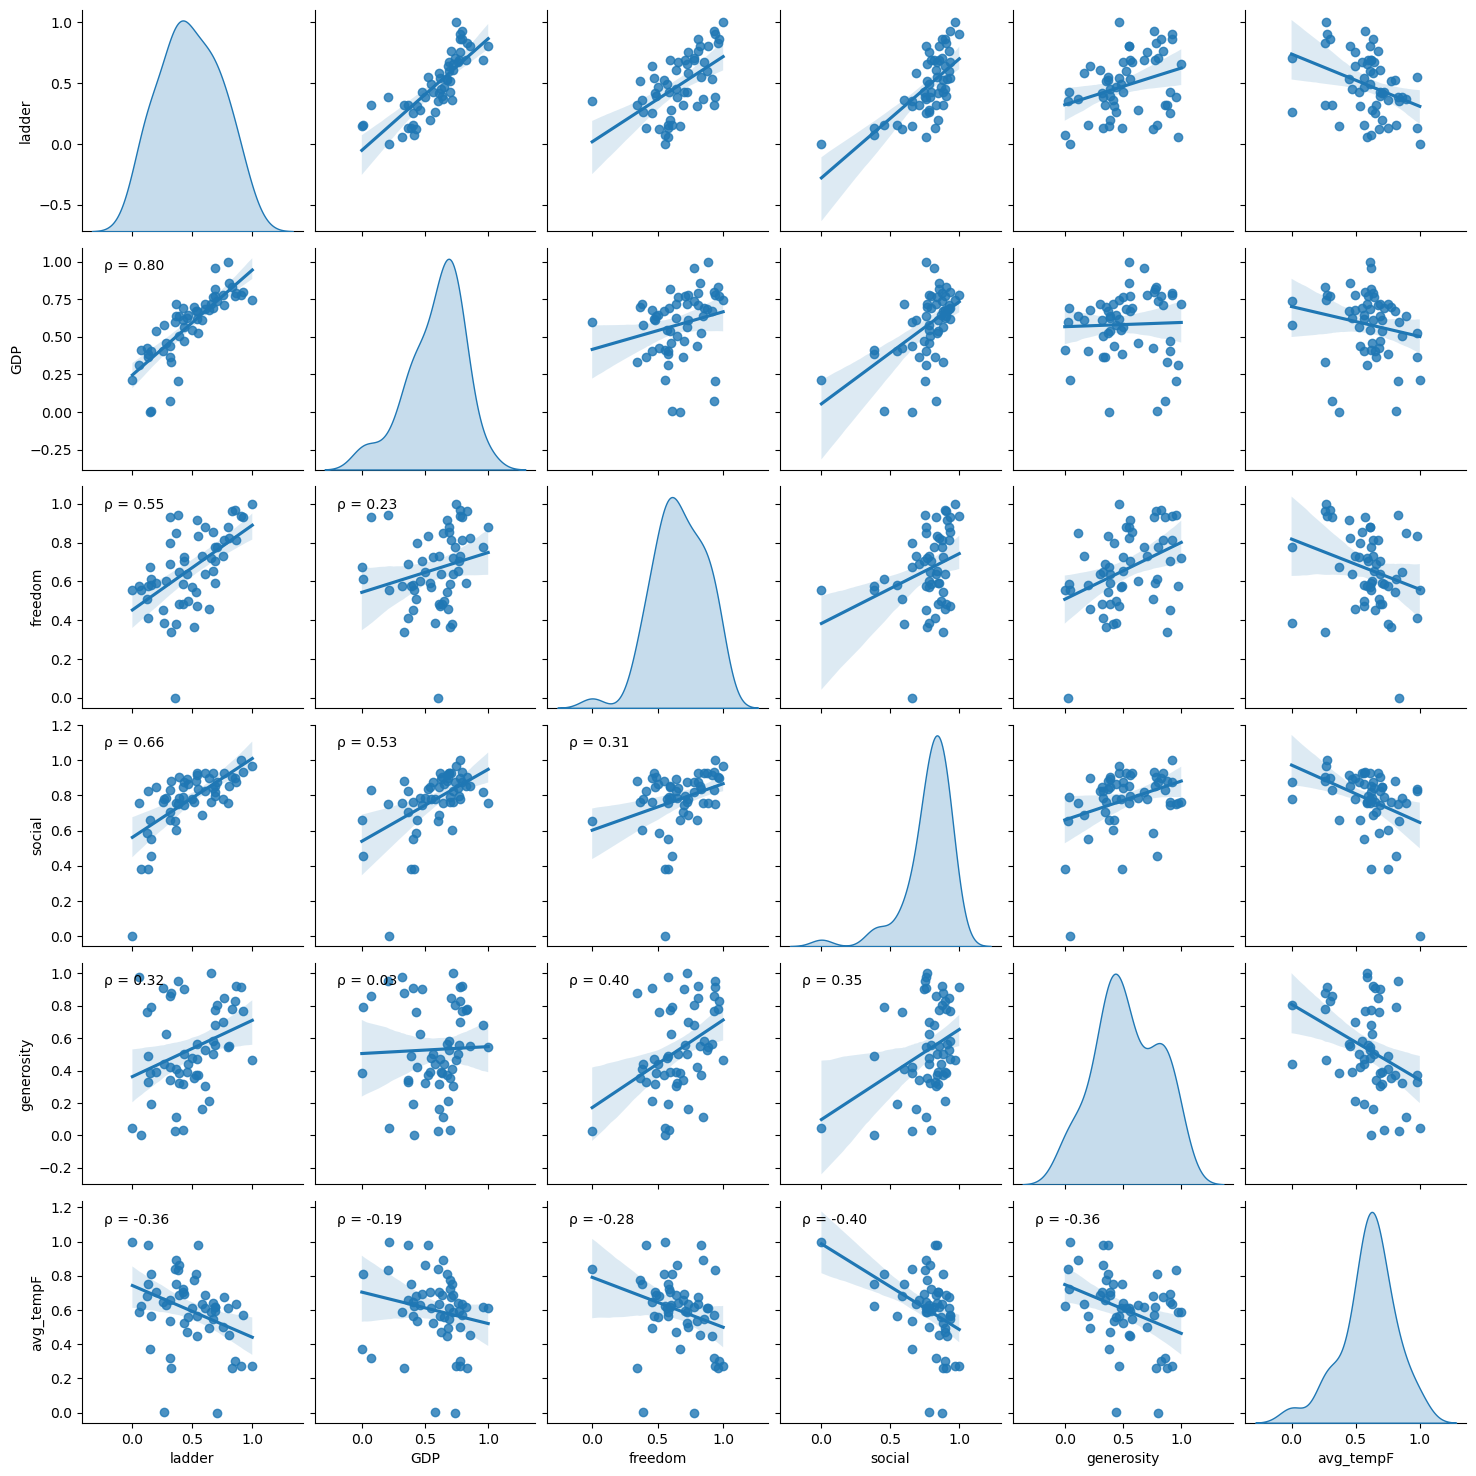

In [51]:
fields = ['ladder', 'GDP', 'freedom', 'social', 'generosity', 'avg_tempF']
plot = cold.copy()
for attr in fields:
    plot[attr] = sklearn.preprocessing.MinMaxScaler().fit_transform(plot[attr].values.reshape(-1,1))

pp = sns.pairplot(plot, vars=fields, kind="reg", diag_kind='kde')
pp.map_lower(corrfunc)
plt.show()

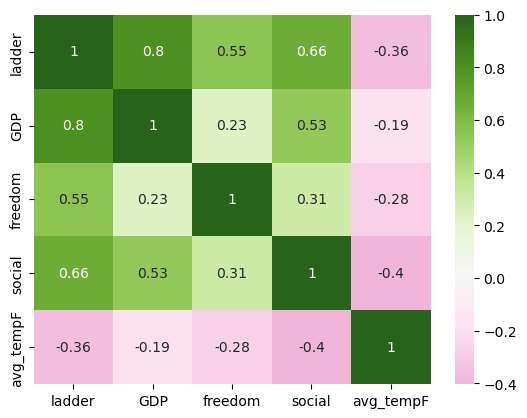

In [52]:
corr_df = cold.filter(items=['ladder', 'GDP', 'freedom', 'social','avg_tempF'])
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", center=0)
plt.show()

In [53]:
hot.describe()

,ladder,GDP,social,freedom,generosity,exp: GDP,exp: freedom,exp: generosity,avg_tempF
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,5.117478,8.941957,0.747493,0.777478,0.018420,1.224884,0.526812,0.146261,76.647565
std,0.973411,1.083021,0.108574,0.105532,0.125449,0.388406,0.140340,0.067328,5.104243
min,3.138000,7.091000,0.531000,0.522000,-0.215000,0.561000,0.187000,0.021000,67.172000
25%,4.397000,8.095000,0.653000,0.696000,-0.070000,0.921000,0.419000,0.099000,73.022000
50%,4.981000,8.985000,0.755000,0.788000,0.005000,1.240000,0.540000,0.139000,77.054000
75%,5.902000,9.584000,0.826000,0.856000,0.097000,1.455000,0.632000,0.189000,80.438000
max,7.473000,11.571000,0.943000,0.958000,0.364000,2.168000,0.768000,0.332000,86.018000


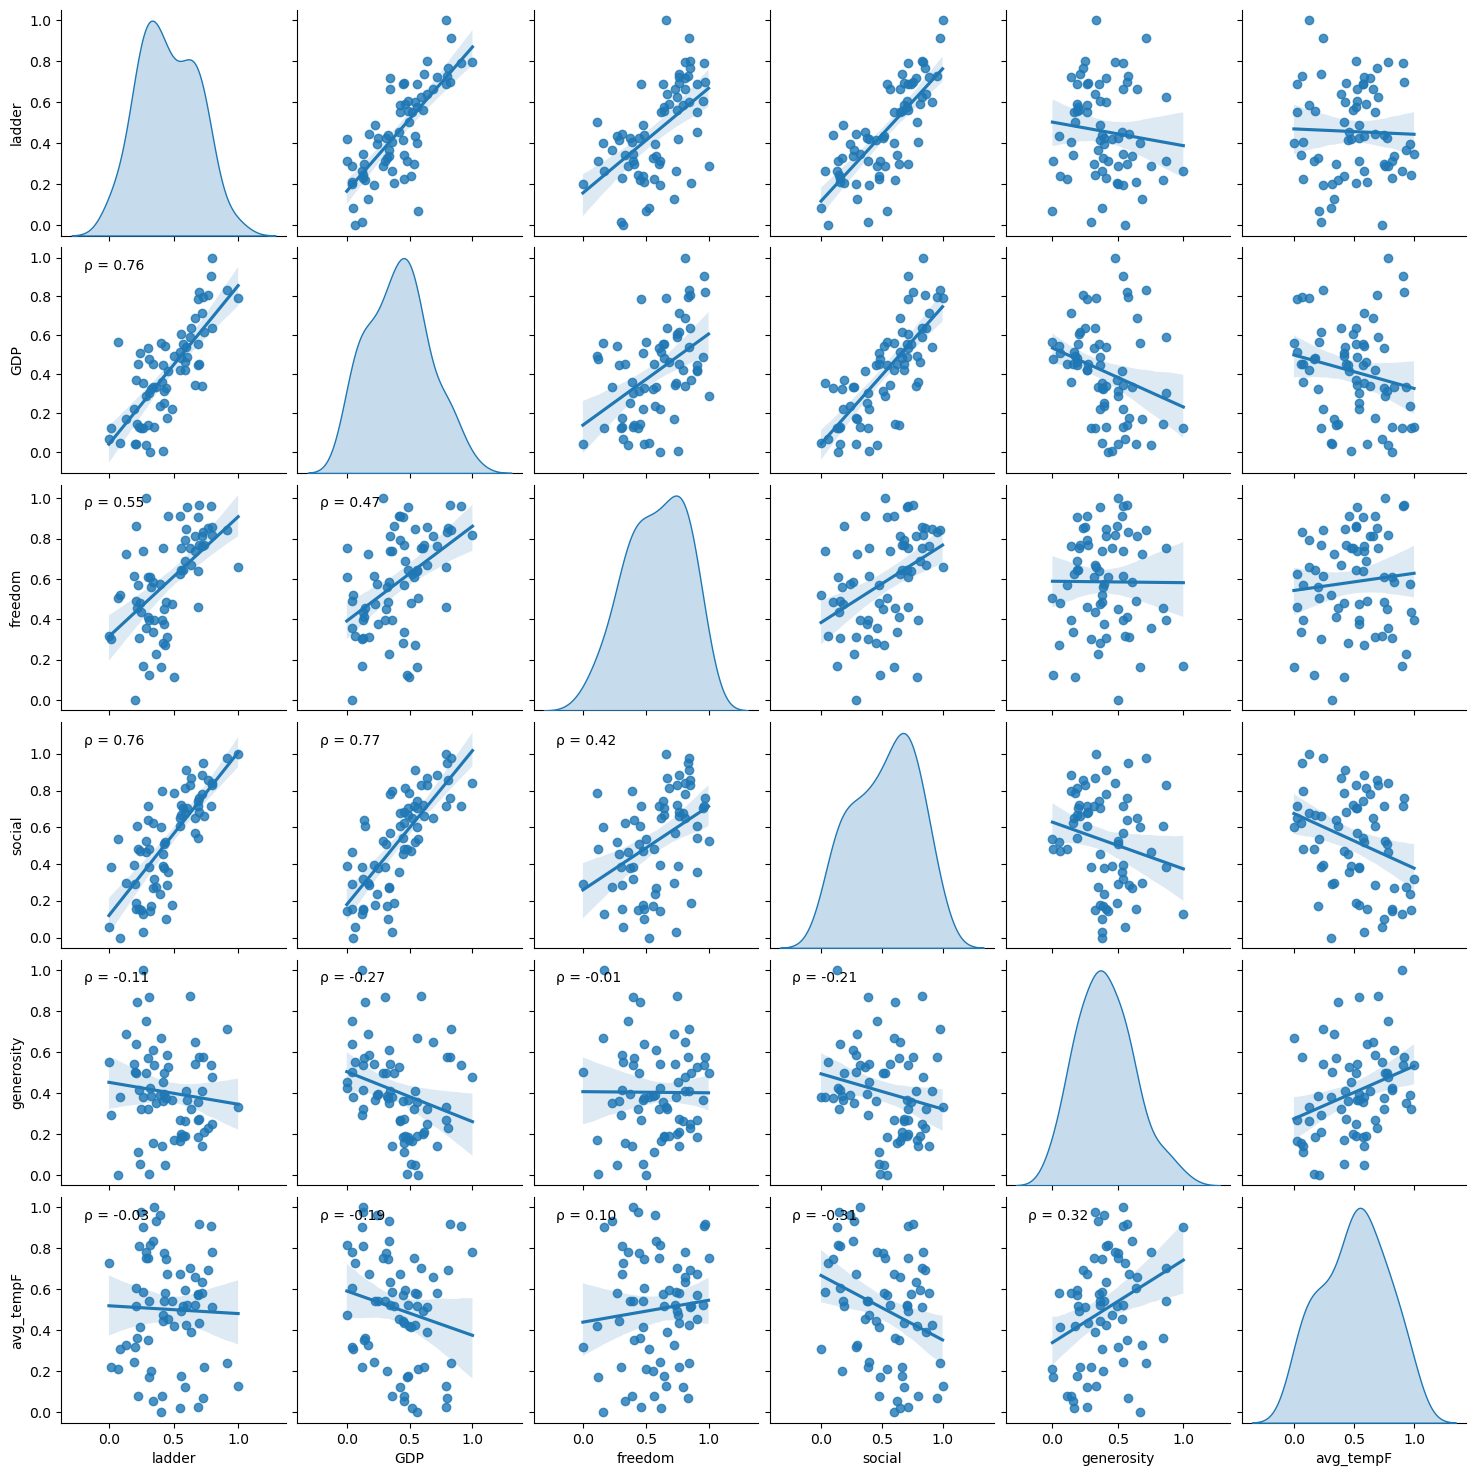

In [54]:
fields = ['ladder', 'GDP', 'freedom', 'social', 'generosity', 'avg_tempF']
plot = hot.copy()
for attr in fields:
    plot[attr] = sklearn.preprocessing.MinMaxScaler().fit_transform(plot[attr].values.reshape(-1,1))

pp = sns.pairplot(plot, vars=fields, kind="reg", diag_kind='kde')
pp.map_lower(corrfunc)
plt.show()

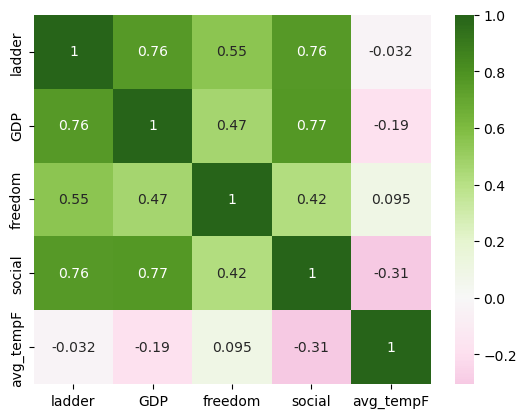

In [55]:
corr_df = hot.filter(items=['ladder', 'GDP', 'freedom', 'social','avg_tempF'])
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", center=0)
plt.show()

## Results and Analysis

*Please see previous visualizations for additional information*

According to this model, it appears that a simple linear regression model was appropriate for GDP as a predictor of Happiness because R^2 > 0.70 and because our p-values were statistically significant. Here is that model:

In [56]:
y = final_set['ladder']
x = final_set[['GDP']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ladder   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 09 May 2023   Prob (F-statistic):           8.22e-35
Time:                        05:36:54   Log-Likelihood:                -105.81
No. Observations:                 125   AIC:                             215.6
Df Residuals:                     123   BIC:                             221.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7219      0.428     -4.021      0.0

However, our model's performance is improved by taking into account the  interaction between freedom, GDP & Social Support. We retain our statistical significant and improve our fit to the data. Here is the improved multilinear regression model below: 

In [57]:
data = final_set
model = smf.ols(formula='ladder ~ freedom:GDP:social', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ladder   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     510.6
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.32e-45
Time:                        05:36:54   Log-Likelihood:                -80.607
No. Observations:                 125   AIC:                             165.2
Df Residuals:                     123   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6035      0

Lastly, we show that our model could be additionally improved by feature engineering. Specifically, breaking the data into two groups based on high and low temperatures. Our final exploration of these groups showed that Social Support appeared to have a higher correlation with Happiness in hotter regions than in colder regions. Further exploration is needed to determine what additional subgroups may exist in terms of climate or population size. 

## Discussion & Conclusion

### Takeaways
Overall, I learned how intricate and endless data analysis can be which has made me excited to learn more. I learned about how to use VIF which is a simple but powerful tool. In addition, I have a better understanding of how powerful data can be in motivating people and nations to change. 

### Difficulties
I realized as I was going through that the dataset is relatively small (n=125 after cleaning). I would have liked a dataset that is broken down into more regions or even cities, which would have been huge, but more informative. 

### Improvements
I would like to explore feature engineering more next time. I was disappointed that I ran out of time to explore the temperature regions. I would have liked to include things like climate, precipitation, food security, homelessness, trust, and peer relationships in addition to the fields provided in the data set. 